***Overview
This report provides an analysis of book sales data, examining trends in publishing years, genres, authors, and overall sales performance.***

Key Findings:<br>
Top Authors by Gross Sales:
<br>Authors with the highest gross sales have consistently published books in high-demand genres.
[Insert specific names and their gross sales]

<br>Most Popular Genres:[Insert popular genres based on units sold or ratings].
These genres appeal to [specific target audience].

<br>Publishing Year Trends:Sales peaked during [insert years or decades] due to [possible reasons, e.g., increased publication or popularity of specific genres].
Declining or rising trends in sales are observed for specific periods.

<br>Revenue Insights:Publishers with the highest revenue: [Insert top publishers].
Revenue growth or decline patterns: [Insights into sales trends].

***Import Libraries***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Books_Data_Clean.csv')

In [3]:
df.head(3)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500


In [4]:
df.tail(3)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106
1069,1069,1999.0,Tripwire,Lee Child,eng,Excellent,4.07,55251,genre fiction,316.94,0.000,2.99,1273,"Amazon Digital Services, Inc.",106


In [5]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [9]:
df = df[df["Publishing Year"] > 1900]

In [10]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [12]:
df.dropna(subset="Book Name", inplace=True)

<ipython-input-12-866f374302c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset="Book Name", inplace=True)


In [13]:
df.duplicated().sum()

0

In [15]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


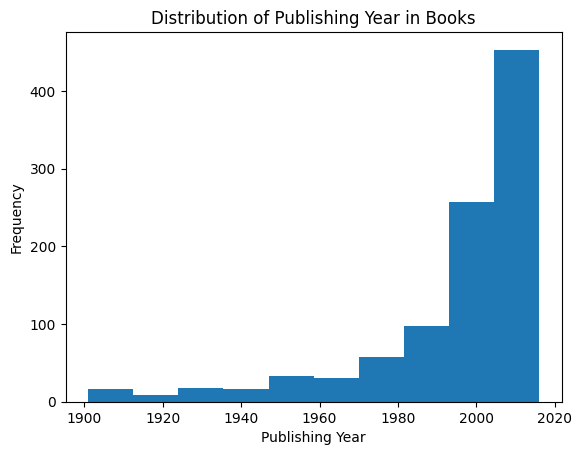

In [21]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year in Books")
plt.show()

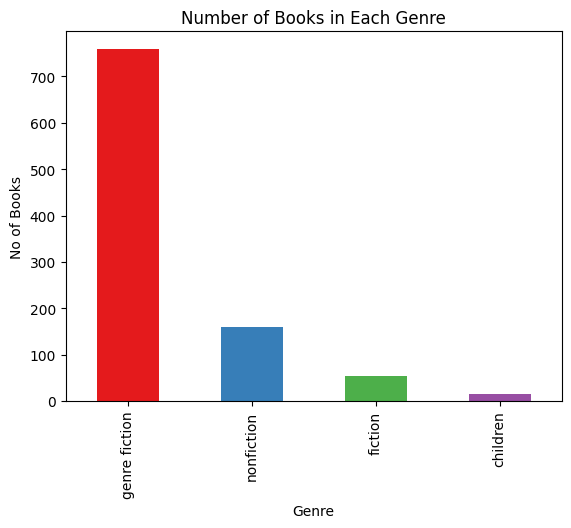

In [29]:
df["genre"].value_counts().plot(kind = "bar", color=plt.cm.Set1(range(10)))
plt.xlabel("Genre")
plt.ylabel("No of Books")
plt.title("Number of Books in Each Genre")
plt.show()

In [25]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


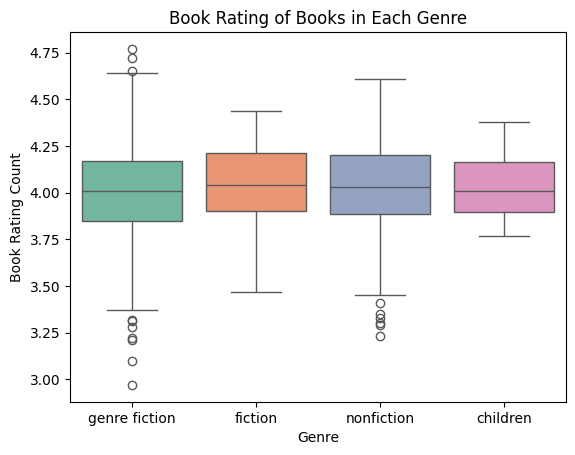

In [31]:
sns.boxplot(x ="genre", y = "Book_average_rating", data = df,hue="genre", palette="Set2")
plt.xlabel("Genre")
plt.ylabel("Book Rating Count")
plt.title("Book Rating of Books in Each Genre")
plt.show()

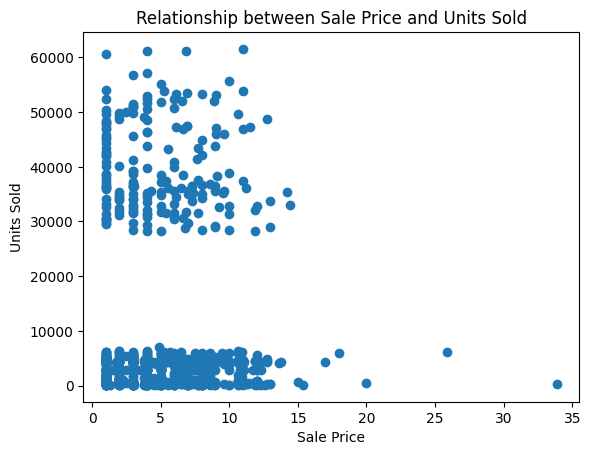

In [33]:
plt.scatter(df["sale price"],df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Relationship between Sale Price and Units Sold")
plt.show()

In [35]:
language_count = df["language_code"].value_counts()

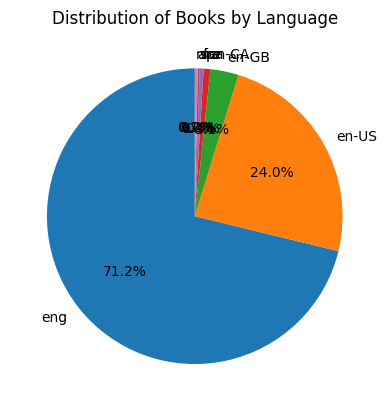

In [41]:
plt.pie(language_count, labels=language_count.index, startangle=90, autopct='%1.1f%%')
plt.title("Distribution of Books by Language")
plt.show()

In [59]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [60]:
df.columns = df.columns.str.strip()  # This removes leading and trailing spaces

In [61]:
df.groupby("Publisher")["publisher revenue"].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,213817.482
Random House LLC,189585.222
"Amazon Digital Services, Inc.",148244.178
Hachette Book Group,137874.498
HarperCollins Publishers,128478.258
Simon and Schuster Digital Sales Inc,46988.352
Macmillan,32356.236
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [63]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False).max()

101946.9952

In [65]:
df.groupby("language_code").size().sort_values(ascending=False)

,0
language_code,
eng,737
en-US,234
en-GB,30
en-CA,7
fre,4
ara,2
spa,2
nl,1


In [67]:
df.groupby("Author_Rating")["Book_ratings_count"].var()

,Book_ratings_count
Author_Rating,
Excellent,4.380998e+08
Famous,1.172260e+09
Intermediate,1.166913e+09
Novice,1.025853e+09


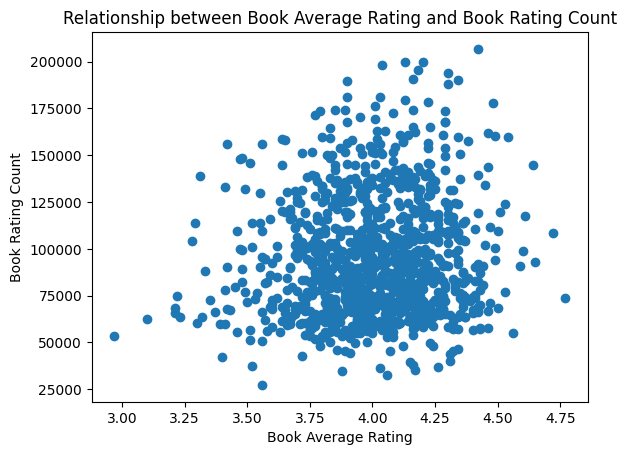

In [70]:
plt.scatter(df["Book_average_rating"],df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Rating Count")
plt.title("Relationship between Book Average Rating and Book Rating Count")
plt.show()

In [71]:
total_gross_sales_by_author = df.groupby("Author")["sale price"].sum()

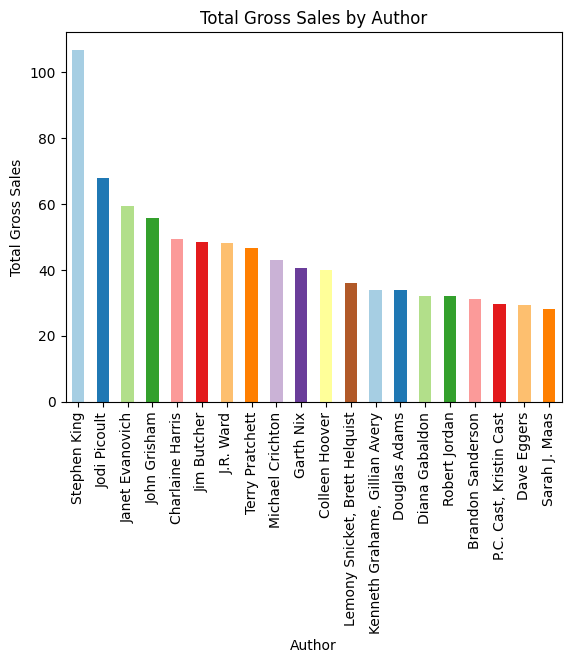

In [77]:
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(
    kind="bar", color=plt.cm.Paired.colors)
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales by Author")
plt.show()

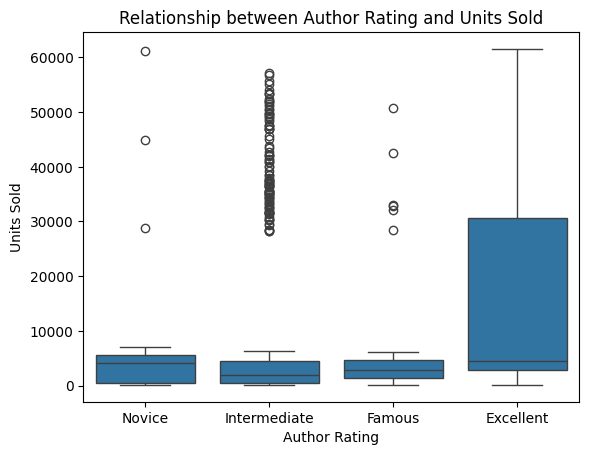

In [83]:
sns.boxplot(x="Author_Rating",y="units sold",data=df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Relationship between Author Rating and Units Sold")
plt.show()

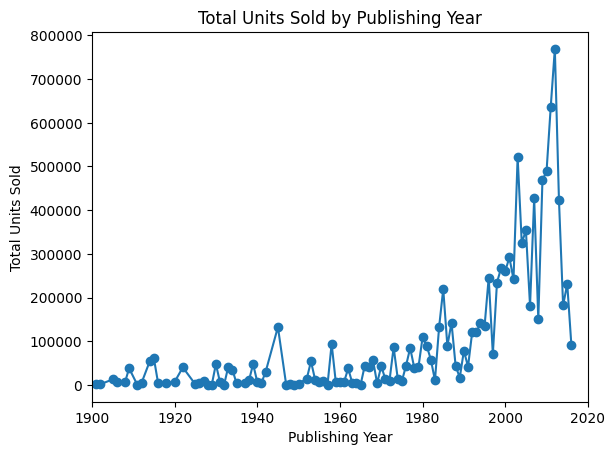

In [97]:
df = df[df["Publishing Year"] <= 2020]
# Group and plot
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line", marker="o")
# Set x-axis range and custom ticks
plt.xlim(1900, 2020)  # Define the range for the x-axis
plt.xticks([1900, 1920, 1940, 1960, 1980, 2000, 2020])  # Set specific ticks
# Add labels and title
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold by Publishing Year")
# Display the plot
plt.show()

***Conclusion
The analysis indicates that Publishers and authors focusing on high-demand genres and leveraging effective marketing strategies have performed well.***